In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [9]:
crime_data = pd.read_csv('Chicago_Crimes.csv',  error_bad_lines=False)
crime_data.head()

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/Applications/ANACONDA/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [21]:
print(type(crime_data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
#print data shape
crime_data.shape

(1923515, 23)

In [11]:
#print the information
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923515 entries, 0 to 1923514
Data columns (total 23 columns):
Unnamed: 0              int64
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            object
Year                    float64
Updated On              object
Latitude                object
Longitude               float64
Location                object
dtypes: bool(2), float64(6), int64(3), object(12)
memory usage: 311.8+ MB


In [13]:
# the Date column may need to be changed to python's datatime.
#datetime format to extract the month, time and day of the week information.

In [16]:
# Different type of crimes under "Primary Type" column
crime = crime_data['Primary Type'].sort_values().unique()
crime

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM',
       'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype=object)

In [17]:
len(crime)

31

In [22]:
crime_data.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On','Year', 
                 'FBI Code', 'Beat','Ward','Community Area', 'Location'], 
                inplace=True, axis=1)


In [23]:
crime_data.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,NaN,NaN,NaN,NaN
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1.87676e+06,41.8172,-87.637328
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,NaN,NaN,NaN,NaN
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,25.0,NaN,NaN,NaN,NaN
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,22.0,1174948.0,1.83105e+06,41.6918,-87.635116


In [24]:
crime_data.shape

(1923507, 13)

In [25]:
# convert dates to pandas datetime format
crime_data.Date = pd.to_datetime(crime_data.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crime_data.index = pd.DatetimeIndex(crime_data.Date)

In [26]:
crime_data.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,4.0,NaN,NaN,NaN,NaN
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1.87676e+06,41.8172,-87.637328
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,14.0,NaN,NaN,NaN,NaN
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,25.0,NaN,NaN,NaN,NaN
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,22.0,1174948.0,1.83105e+06,41.6918,-87.635116


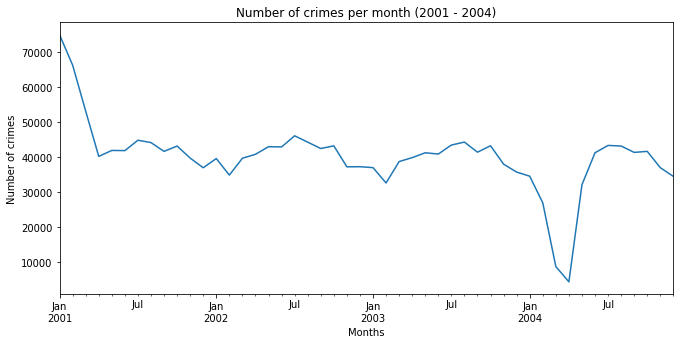

In [27]:
# how many records we have for each month
plt.figure(figsize=(11,5))
crime_data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2004)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

 I decided to look at the rolling sum of crimes of the past year. The idea is, for each day, we calculate the sum of crimes of the past year. If this rolling sum is decreasing, then we know for sure that crime rates have been decreasing during that year. On the other hand, if the rolling sum stays the same during a given year, then we can conclude that crime rates stayed the same.

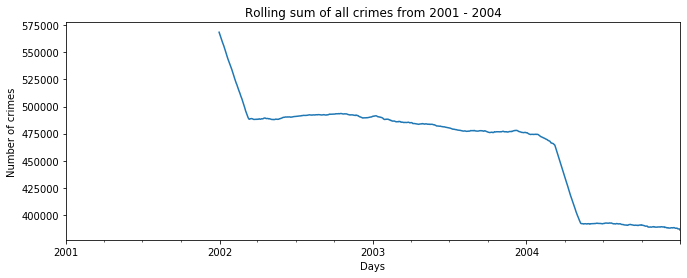

In [28]:
plt.figure(figsize=(11,4))
crime_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2004')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

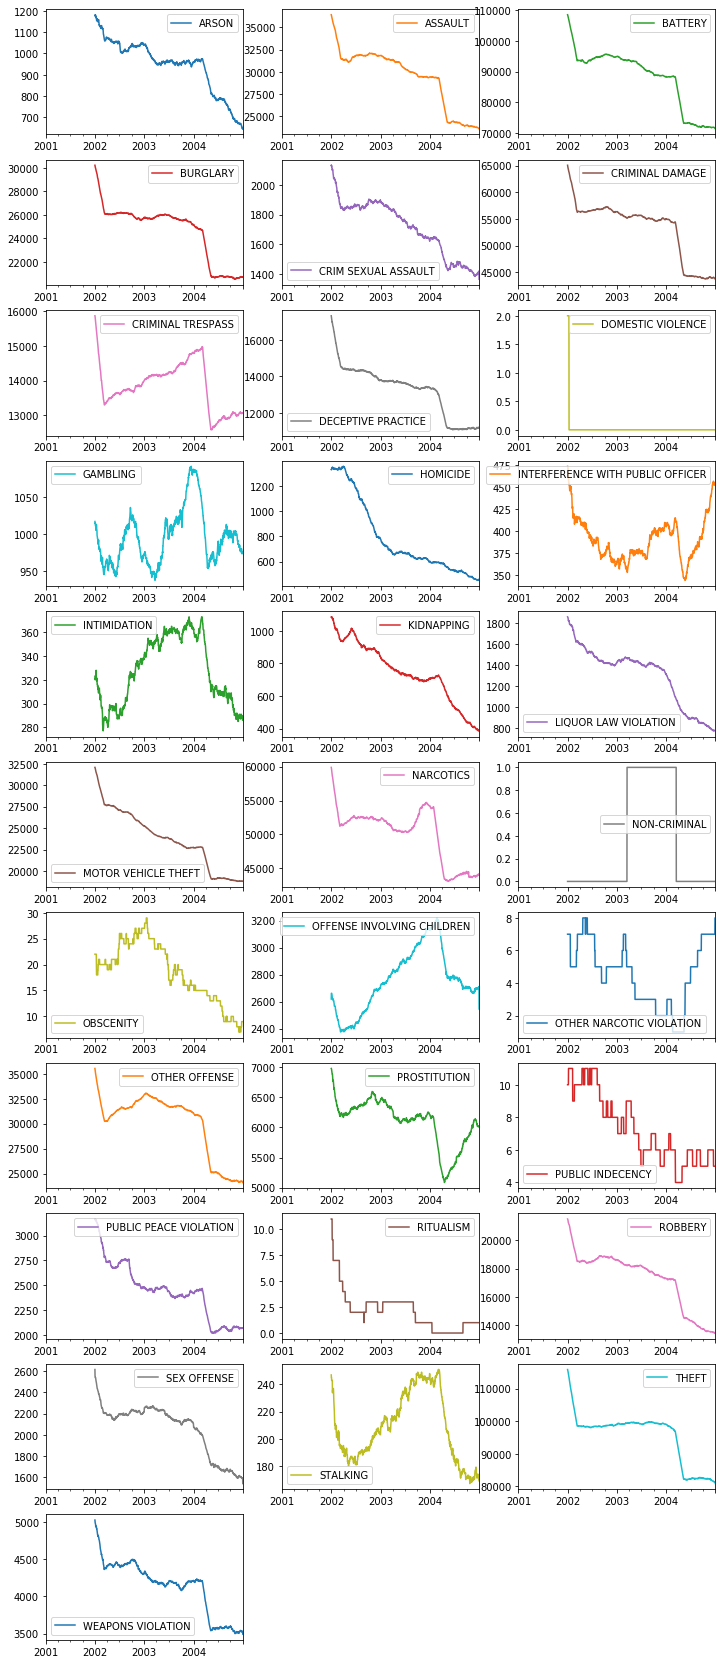

In [29]:
crimes_count_date = crime_data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', 
                                           index=crime_data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, 
                                                layout=(-1, 3), sharex=False, sharey=False)

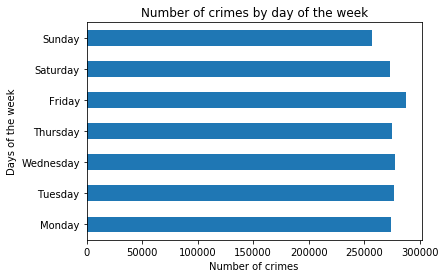

In [30]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_data.groupby([crime_data.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

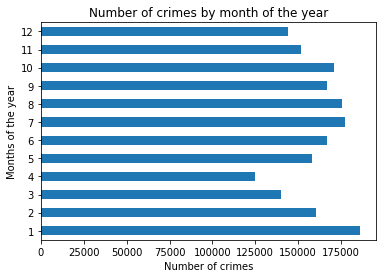

In [31]:
crime_data.groupby([crime_data.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

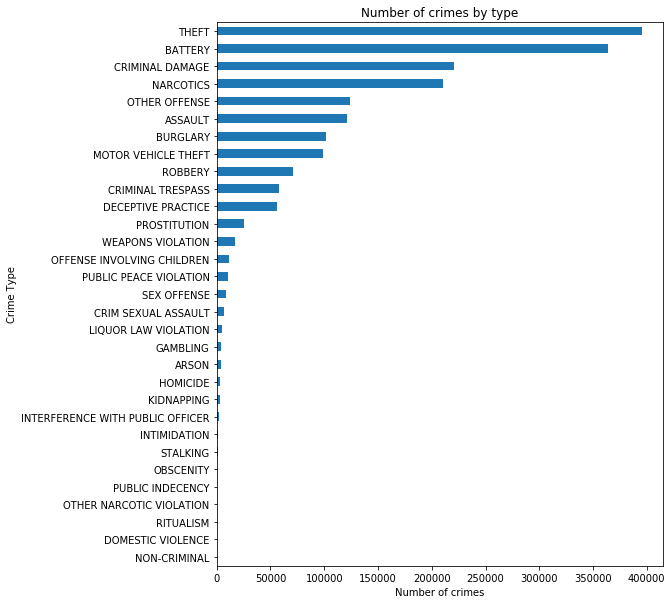

In [32]:
plt.figure(figsize=(8,10))
crime_data.groupby([crime_data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [42]:
hour_by_location = crime_data.pivot_table(values='ID', index='Location Description', 
                    columns=crime_data.index.hour, aggfunc=np.size).fillna(0)

In [43]:
hour_by_location

Date,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Location Description,,,,,,,,,,,,,,,,,,,,,
ABANDONED BUILDING,64.0,43.0,35.0,24.0,29.0,26.0,52.0,53.0,52.0,95.0,...,114.0,108.0,154.0,105.0,103.0,96.0,96.0,80.0,69.0,62.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
AIRPORT/AIRCRAFT,336.0,119.0,61.0,61.0,85.0,149.0,282.0,311.0,522.0,399.0,...,414.0,435.0,404.0,397.0,383.0,319.0,302.0,264.0,197.0,168.0
ALLEY,2021.0,1457.0,1187.0,1051.0,753.0,510.0,476.0,621.0,837.0,962.0,...,2181.0,2196.0,2253.0,2239.0,2675.0,3073.0,3094.0,2966.0,2912.0,2338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VESTIBULE,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WAREHOUSE,119.0,48.0,41.0,36.0,32.0,48.0,54.0,97.0,142.0,205.0,...,169.0,234.0,227.0,242.0,186.0,121.0,107.0,82.0,68.0,59.0
WOODED AREA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
hour_by_type     = crime_data.pivot_table(values='ID', index='Primary Type', 
                        columns=crime_data.index.hour, aggfunc=np.size).fillna(0)


hour_by_week     = crime_data.pivot_table(values='ID', index=crime_data.index.hour, 
                        columns=crime_data.index.weekday_name, aggfunc=np.size).fillna(0)

hour_by_week     = hour_by_week[days].T 


dayofweek_by_location = crime_data.pivot_table(values='ID', index='Location Description', 
                        columns=crime_data.index.dayofweek, aggfunc=np.size).fillna(0)

dayofweek_by_type = crime_data.pivot_table(values='ID', index='Primary Type', 
                        columns=crime_data.index.dayofweek, aggfunc=np.size).fillna(0)

location_by_type  = crime_data.pivot_table(values='ID', index='Location Description', 
                        columns='Primary Type', aggfunc=np.size).fillna(0)

In [45]:
print(hour_by_type.head())
print(hour_by_week.head())
print(hour_by_week.head())
print(dayofweek_by_location.head())
print(dayofweek_by_type.head())
print(location_by_type.head())

Date                      0        1        2        3       4       5   \
Primary Type                                                              
ARSON                  331.0    318.0    342.0    303.0   224.0   178.0   
ASSAULT               4032.0   3261.0   2541.0   1826.0  1394.0  1033.0   
BATTERY              18766.0  17096.0  15084.0  11776.0  8406.0  5518.0   
BURGLARY              5091.0   2572.0   2333.0   2131.0  1949.0  2486.0   
CRIM SEXUAL ASSAULT    919.0    418.0    422.0    399.0   349.0   248.0   

Date                     6       7       8        9   ...       14       15  \
Primary Type                                          ...                     
ARSON                  96.0    85.0    97.0     88.0  ...     93.0     80.0   
ASSAULT              1203.0  2054.0  4009.0   4930.0  ...   7889.0   7544.0   
BATTERY              4364.0  5555.0  9133.0  10762.0  ...  19955.0  19590.0   
BURGLARY             3369.0  5189.0  6572.0   5459.0  ...   4283.0   4685.0   
